In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ankitbaliyan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# importing dataset
df_train = pd.read_csv("../01_dataset/train.csv")
df_test = pd.read_csv("../01_dataset/test.csv")
df_submission = pd.read_csv("../01_dataset/sample_submission.csv")

In [3]:
df_train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


# Data Cleaning: Handle missing values, remove duplicates, and correct errors.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [5]:
df_train.isna().sum()


id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [6]:
df_test.isna().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

- No missing value in the dataset

In [7]:
print("Duplicates in training data:",df_train.duplicated().any())
print("Duplicates in test data:",df_test.duplicated().any())

Duplicates in training data: False
Duplicates in test data: False


- No duplicates in dataset

# Data Transformation: Normalize or standardize the data if the scales of the features vary widely.

In [8]:
df_train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [9]:
# using min max scaler to transform data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(df_train.drop(["id"], axis=1))
#test_scaled = scaler.transform(df_test.drop("id", axis=1))


# Converting scaled data back to DataFrame for better readability
train_scaled_df = pd.DataFrame(train_scaled, columns=df_train.drop(["id"], axis=1).columns)
#test_scaled_df = pd.DataFrame(test_scaled, columns=df_test.drop("id", axis=1).columns)


In [10]:
train_scaled_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0.006536,0.001309,0.149254,0.800000,0.123133,0.727288,0.803369,0.769778,0.532231,0.600576,0.083370,0.555556
1,0.006536,0.011753,0.149254,0.800000,0.121260,0.789780,0.800174,0.724889,0.563175,0.596519,0.065415,0.611111
2,0.004967,0.013818,0.232836,0.933333,0.201549,0.792762,0.821377,0.794667,0.534706,0.582910,0.137314,0.166667
3,0.006536,0.013677,0.149254,0.800000,0.120749,0.718132,0.769097,0.722667,0.579265,0.592346,0.071957,0.555556
4,0.007582,0.014894,0.173134,0.800000,0.149272,0.775589,0.803369,0.747556,0.554510,0.596540,0.169992,0.555556


# Feature Selection: 
- Use techniques like correlation matrices, feature importance from tree-based models, or wrapper methods.

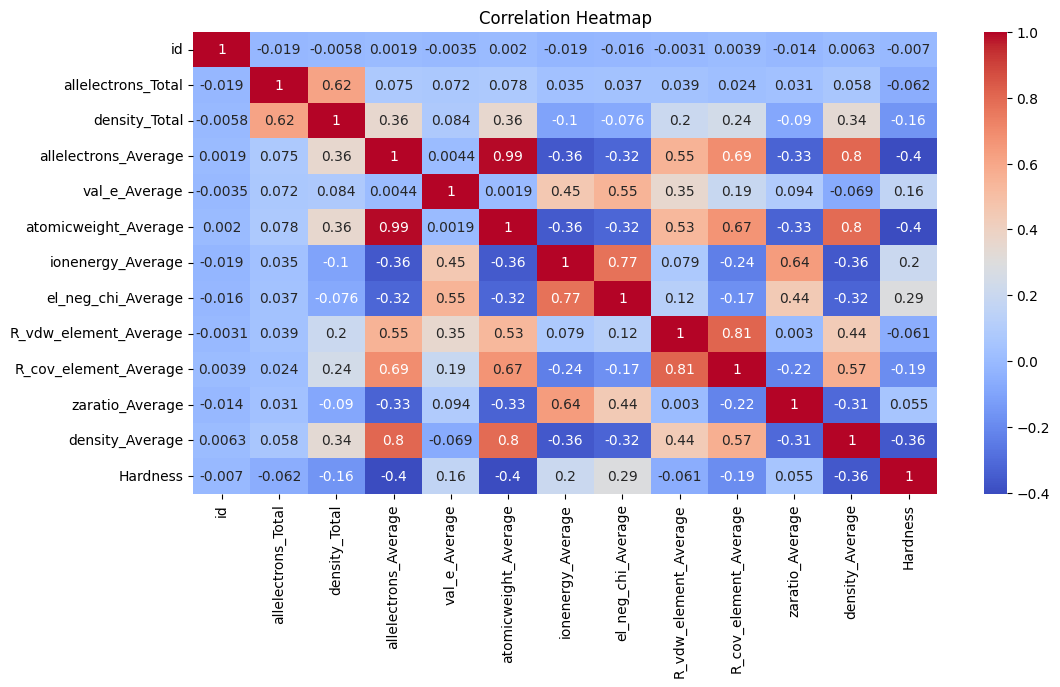

Features correlated with Hardness:
 Hardness                 1.000000
el_neg_chi_Average       0.290352
ionenergy_Average        0.203203
val_e_Average            0.161715
zaratio_Average          0.055248
id                      -0.006989
R_vdw_element_Average   -0.061402
allelectrons_Total      -0.061687
density_Total           -0.161524
R_cov_element_Average   -0.189111
density_Average         -0.360780
allelectrons_Average    -0.400496
atomicweight_Average    -0.402948
Name: Hardness, dtype: float64


In [11]:

# Calculate the correlation matrix
corr_matrix = df_train.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Select features with high correlation to 'Hardness'
correlated_features = corr_matrix['Hardness'].sort_values(ascending=False)
print("Features correlated with Hardness:\n", correlated_features)


In [12]:
select_features_corr = correlated_features.keys().to_list()

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Separate features and target
X = train_scaled_df
y = df_train['Hardness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a linear regression model
model = LinearRegression()

# Initialize RFECV
selector = RFECV(model, step=1, cv=5)

# Fit RFECV
selector = selector.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features:", selector.n_features_)

# Get the mask of selected features
selected_features = X_train.columns[selector.support_]

print("Selected features:\n", selected_features.to_list())
select_features_rfe = selected_features.to_list()

Optimal number of features: 1
Selected features:
 ['Hardness']


# Model Selection and Model Training

## Building model without scalling features

### Model Training

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

def validate_model(y_test, predictions):
    return median_absolute_error(y_test, predictions)

# Load your dataset


# Prepare data
X = df_train.drop(['Hardness','id'], axis=1)
y = df_train['Hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Median Absolute Error'])

# Iterate over models
for model in models:
    predictions = train_and_predict(model, X_train, y_train, X_test)
    medae = validate_model(y_test, predictions)
    results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)


/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/1139471279.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/1139471279.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/1139471279.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/fo

### Model Output Summary

In [15]:
# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)

,Model,Median Absolute Error
4,RandomForestRegressor,0.695500
5,GradientBoostingRegressor,0.696774
3,DecisionTreeRegressor,0.800000
6,SVR,0.901904
0,LinearRegression,0.974693
1,Ridge,0.977043
2,Lasso,1.082967


## Building model with scaled features : Min Max Scaler
- only X is scaled and not y

### Model training

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

def validate_model(y_test, predictions):
    return median_absolute_error(y_test, predictions)

# Load your dataset


# Prepare data
X = train_scaled_df.drop("Hardness", axis=1)
y = df_train['Hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Median Absolute Error'])

# Iterate over models
for model in models:
    predictions = train_and_predict(model, X_train, y_train, X_test)
    medae = validate_model(y_test, predictions)
    results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)

# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)


/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/1133247476.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/1133247476.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/1133247476.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/fo

,Model,Median Absolute Error
6,SVR,0.671732
4,RandomForestRegressor,0.673000
5,GradientBoostingRegressor,0.698975
3,DecisionTreeRegressor,0.800000
1,Ridge,0.972657
0,LinearRegression,0.974693
2,Lasso,1.349850


### Model output summary

In [17]:
# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)

,Model,Median Absolute Error
6,SVR,0.671732
4,RandomForestRegressor,0.673000
5,GradientBoostingRegressor,0.698975
3,DecisionTreeRegressor,0.800000
1,Ridge,0.972657
0,LinearRegression,0.974693
2,Lasso,1.349850


## Model with Scaled predictors and predicted value

### Model Training

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

def validate_model(y_test, predictions):
    return median_absolute_error(y_test, predictions)

# Load your dataset


# Prepare data
X = train_scaled_df.drop("Hardness", axis=1)
y = train_scaled_df['Hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Median Absolute Error'])

# Iterate over models
for model in models:
    predictions = train_and_predict(model, X_train, y_train, X_test)
    medae = validate_model(y_test, predictions)
    results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)

# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)


/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/3614270411.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/3614270411.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/3614270411.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/fo

,Model,Median Absolute Error
4,RandomForestRegressor,0.075389
5,GradientBoostingRegressor,0.078035
3,DecisionTreeRegressor,0.088889
6,SVR,0.090912
1,Ridge,0.108073
0,LinearRegression,0.108299
2,Lasso,0.149983


### Model Output Summary

In [19]:
# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)

,Model,Median Absolute Error
4,RandomForestRegressor,0.075389
5,GradientBoostingRegressor,0.078035
3,DecisionTreeRegressor,0.088889
6,SVR,0.090912
1,Ridge,0.108073
0,LinearRegression,0.108299
2,Lasso,0.149983



It can be clearly depicted, model with scaled X and Y is best with minimum MAE value. 

# Improving Model Accuracy - Phase 1

### Using Coorelated columns for Features Selection

In [20]:
correlated_features[correlated_features.values>0].keys().to_list()

['Hardness',
 'el_neg_chi_Average',
 'ionenergy_Average',
 'val_e_Average',
 'zaratio_Average']

#### Model Training

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

def validate_model(y_test, predictions):
    return median_absolute_error(y_test, predictions)

# Load your dataset


# Prepare data
X = train_scaled_df[correlated_features[correlated_features.values>0].keys().to_list()].drop("Hardness", axis=1)
y = train_scaled_df['Hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Median Absolute Error'])

# Iterate over models
for model in models:
    predictions = train_and_predict(model, X_train, y_train, X_test)
    medae = validate_model(y_test, predictions)
    results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)

# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)


/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/807934158.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/807934158.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/807934158.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folde

,Model,Median Absolute Error
4,RandomForestRegressor,0.078764
5,GradientBoostingRegressor,0.079539
3,DecisionTreeRegressor,0.088889
6,SVR,0.094233
0,LinearRegression,0.133879
1,Ridge,0.133948
2,Lasso,0.149983


#### Output Summary

In [22]:
# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)

,Model,Median Absolute Error
4,RandomForestRegressor,0.078764
5,GradientBoostingRegressor,0.079539
3,DecisionTreeRegressor,0.088889
6,SVR,0.094233
0,LinearRegression,0.133879
1,Ridge,0.133948
2,Lasso,0.149983


- Error actually reduced for best performing model

### using RFE method

In [23]:
select_features_rfe

['Hardness']

#### Model Training

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

def validate_model(y_test, predictions):
    return median_absolute_error(y_test, predictions)

# Load your dataset


# Prepare data
X = train_scaled_df[select_features_rfe]
y = train_scaled_df['Hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Median Absolute Error'])

# Iterate over models
for model in models:
    predictions = train_and_predict(model, X_train, y_train, X_test)
    medae = validate_model(y_test, predictions)
    results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)

# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)


/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/3493996849.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/3493996849.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_65044/3493996849.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model.__class__.__name__, 'Median Absolute Error': medae}, ignore_index=True)
/var/fo

,Model,Median Absolute Error
4,RandomForestRegressor,3.608225e-16
3,DecisionTreeRegressor,5.551115e-16
0,LinearRegression,6.661338e-16
5,GradientBoostingRegressor,8.532687e-06
1,Ridge,5.102361e-04
6,SVR,6.069479e-02
2,Lasso,1.499833e-01


#### Model Output Summary

In [25]:
# Display the summary DataFrame
results.sort_values("Median Absolute Error", ascending=True)

,Model,Median Absolute Error
4,RandomForestRegressor,3.608225e-16
3,DecisionTreeRegressor,5.551115e-16
0,LinearRegression,6.661338e-16
5,GradientBoostingRegressor,8.532687e-06
1,Ridge,5.102361e-04
6,SVR,6.069479e-02
2,Lasso,1.499833e-01


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error
import numpy as np

train_data = df_train.copy()
test_data = df_test.copy()
submission_data = df_submission.copy()

# Drop 'id' column as it's not relevant for the model
train_data.drop('id', axis=1, inplace=True)
test_data.drop('id', axis=1, inplace=True)

# Separate features and target variable
X = train_data.drop('Hardness', axis=1)
y = train_data['Hardness']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler
scaler = StandardScaler()

# Apply feature scaling to the training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model with the original training data
model.fit(X_train, y_train)
predictions = model.predict(X_val)
mae_original = median_absolute_error(y_val, predictions)

# Fit the model with the scaled training data
model.fit(X_train_scaled, y_train)
predictions_scaled = model.predict(X_val_scaled)
mae_scaled = median_absolute_error(y_val, predictions_scaled)

# Select best features
selector = SelectKBest(f_regression, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Fit the model with the selected features
model.fit(X_train_selected, y_train)
predictions_selected = model.predict(X_val_selected)
mae_selected = median_absolute_error(y_val, predictions_selected)

# Apply feature scaling and feature selection together
X_train_scaled_selected = scaler.fit_transform(X_train_selected)
X_val_scaled_selected = scaler.transform(X_val_selected)

model.fit(X_train_scaled_selected, y_train)
predictions_scaled_selected = model.predict(X_val_scaled_selected)
mae_scaled_selected = median_absolute_error(y_val, predictions_scaled_selected)

# Prepare the summary DataFrame
summary = pd.DataFrame({
    "Features": ["Original", "Scaled", "Selected", "Scaled & Selected"],
    "Median Absolute Error": [mae_original, mae_scaled, mae_selected, mae_scaled_selected]
})

# Generate predictions on the test set
test_data_scaled_selected = scaler.transform(selector.transform(test_data))
test_predictions = model.predict(test_data_scaled_selected)

# Add predictions to the submission file
submission_data['Hardness'] = test_predictions

submission_data

,id,Hardness
0,10407,3.474654
1,10408,4.824525
2,10409,5.290989
3,10410,5.274703
4,10411,5.117155
...,...,...
6934,17341,5.494298
6935,17342,4.537835
6936,17343,5.456207
6937,17344,4.323472
